In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
from fastai.vision.all import *

In [24]:
from fastai.vision.widgets import *

In [6]:
from PIL import Image

In [7]:
path = untar_data(URLs.MNIST)

In [8]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/testing'),Path('/root/.fastai/data/mnist_png/training')]

In [9]:
def convert_to_rgb(image):
    if isinstance(image, PILImage):
        if image.mode!='RGB':
            return image.convert("RGB")
        return image

In [10]:
class ConvertToRGB(Transform):
    def encodes(self, img:PILImage):
        return convert_to_rgb(img)

In [11]:
dab = DataBlock(
    blocks=(ImageBlock(PILImage), CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
    get_y=parent_label,
    item_tfms=ConvertToRGB(),
    batch_tfms=[*aug_transforms(do_flip=False), Normalize.from_stats(*imagenet_stats)]
)

In [12]:
dls = dab.dataloaders(path, bs=100, num_workers=0)

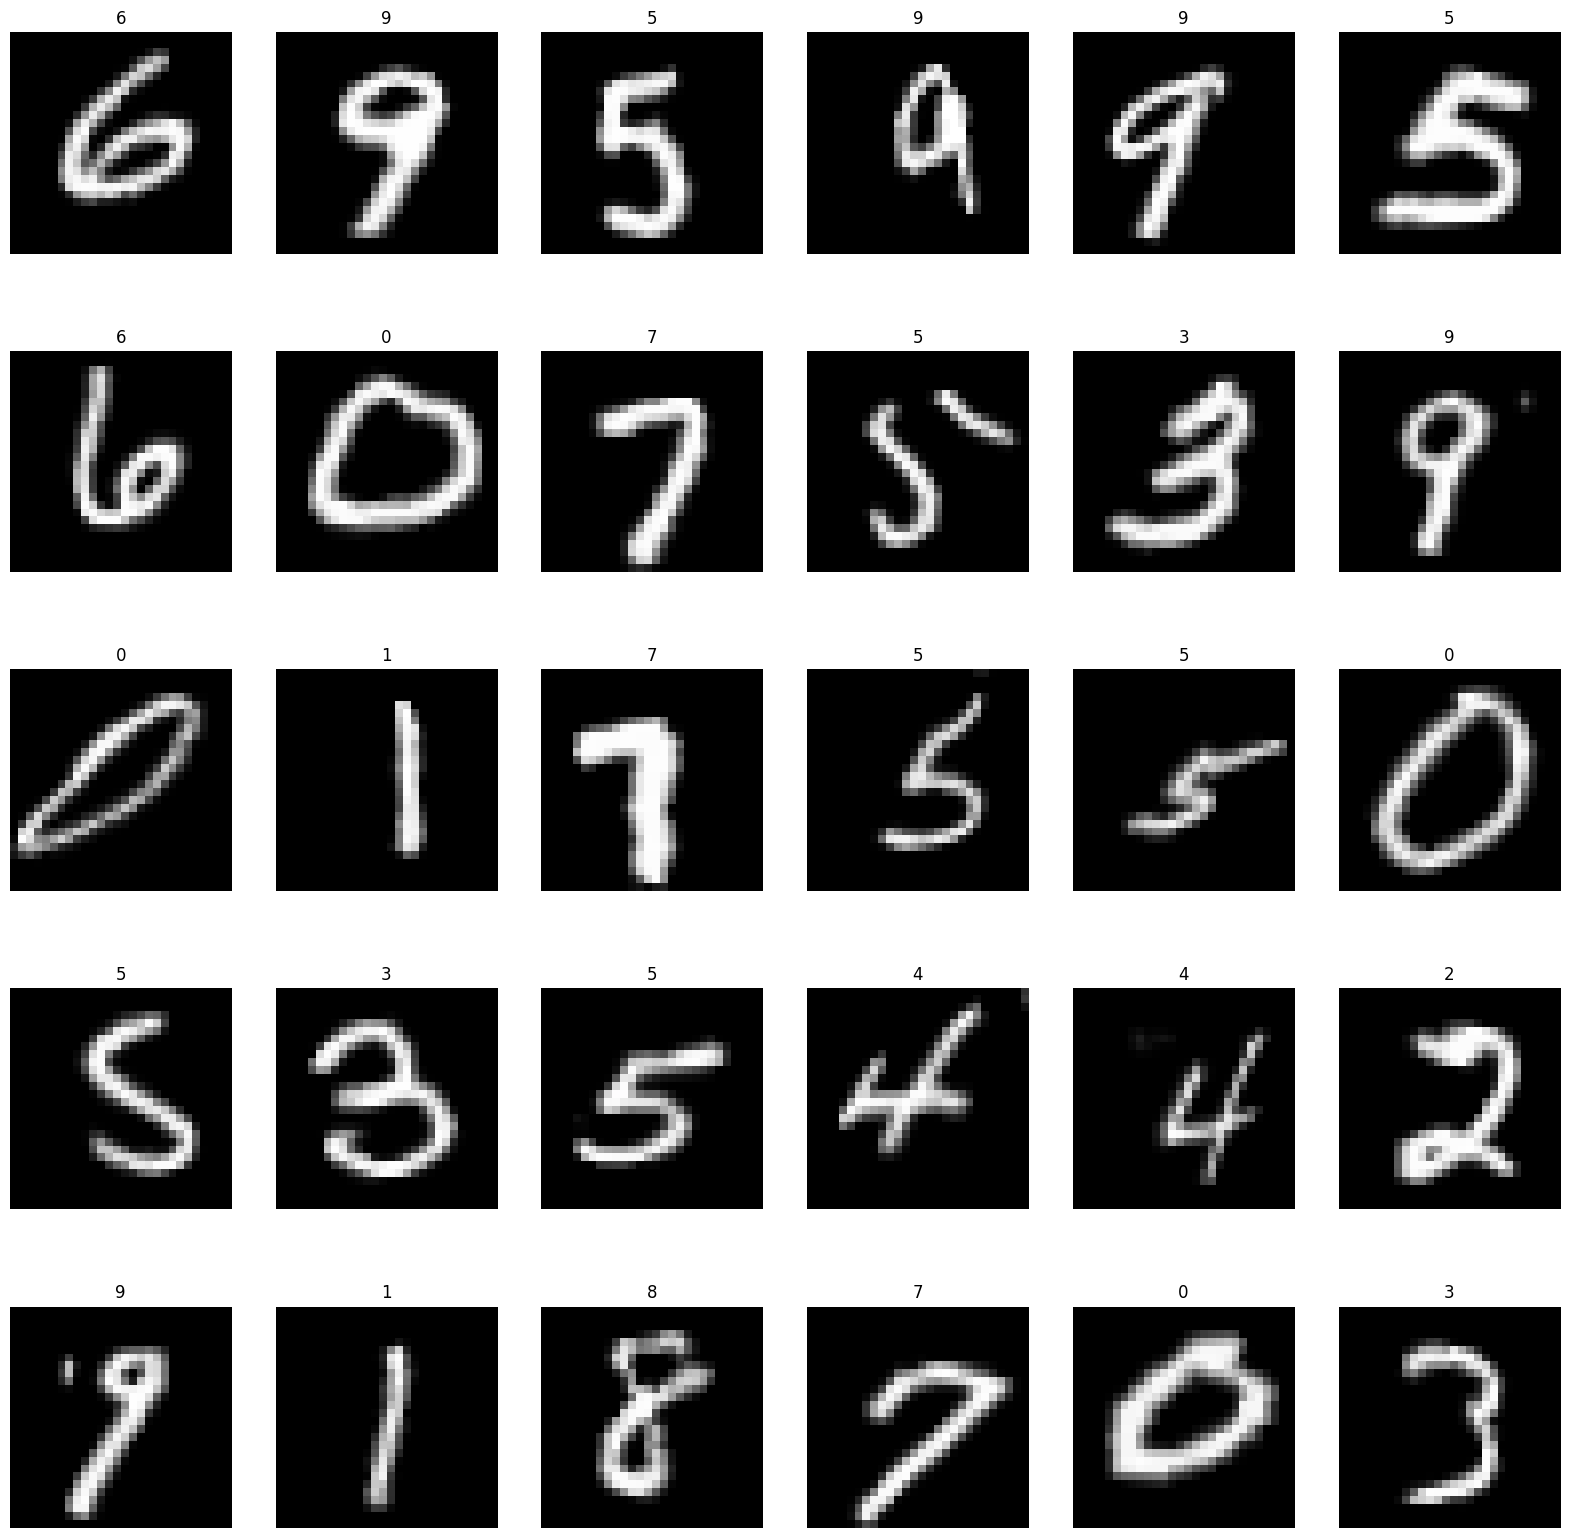

In [13]:
dls.show_batch(max_n=30, figsize=(20,20))

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 61.6MB/s]


In [16]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.851351,0.636803,0.205700,05:26


epoch,train_loss,valid_loss,error_rate,time
0,0.129497,0.096414,0.029100,11:39


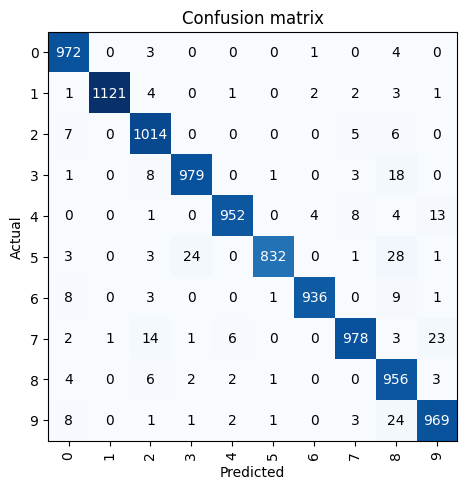

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

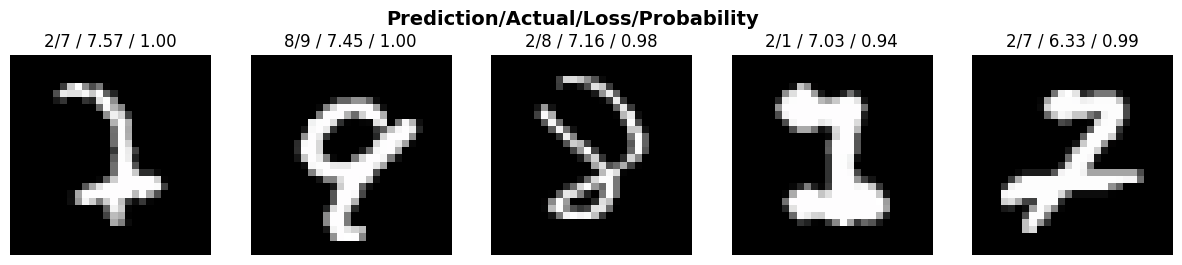

In [20]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner